a/ recombination is an odd term since the hot ionized gas was never combined in the first place.

b/

The Saha equation(6.21) is the following:
\begin{equation}
\begin{split}
& \frac{N_I}{N_{I + 1}} = n_e*\frac{U_I}{2U_{I+1}}*\Big{(}\frac{h^2}{2\pi*m_e\kappa*T}\Big{)}^{\frac{3}{2}}*e^{\frac{E_I}{\kappa * T}}
\end{split}
\end{equation}

Now in order to derrive an expression that links the scale factor R to the ionization fraction q, for the known present-day quantities n_{b,o} and T_o. we need that
\begin{equation}
\begin{split}
&U_1 = 2 = U_I \\
&U_2 = 1 = U_{I+1}
\end{split}
\end{equation}
furthermore we have that:
\begin{equation}
\begin{split}
&q = \frac{N_{II}}{N_I + N_{II}} =\frac{N_{I+1}}{N_I + N_{I + 1}}\\
&\frac{N_{II}}{N_I} = \frac{q}{1-q}
\end{split}
\end{equation}

And we have that:
\begin{equation}
\begin{split}
&T = \frac{T_0}{R} \\
&n_{b,o} = R^3*n_b
\end{split}
\end{equation}

First of all we need to establish our n_e this is easily done by the fact that we assume in the question that only hydrogen supplies free electrons (my guess why this is valid is because in the very early universe there was mostly only H and He wasn't really represented all that much) and the hydrogen has a primordial mass fraction of $X_{prim} = 0.75$.
Now since only Ionized hydrogen supplies free electrons to the cosmic gas we need to multiply the baryonic density with the primordial mass fraction of H and q the fraction of hydrogen atoms that are ionized. We get:

\begin{equation}
\begin{split}
& n_e = n_b*X_{prim}*q
\end{split}
\end{equation}

Plugging this all in the Saha equation we get:

\begin{equation}
\begin{split}
& \frac{N_I}{N_{I + 1}} = n_e*\frac{U_I}{2U_{I+1}}*\Big{(}\frac{h^2}{2\pi*m_e\kappa*T}\Big{)}^{\frac{3}{2}}*e^{\frac{E_I}{\kappa * T}}\\
& \frac{1-q}{q} = n_b*X_{prim}*q*\frac{U_I}{2U_{I+1}}*\Big{(}\frac{h^2}{2\pi*m_e\kappa*T}\Big{)}^{\frac{3}{2}}*e^{\frac{E_I}{\kappa * T}}\\
& \frac{1-q}{q^2} = n_b*X_{prim}*1*\Big{(}\frac{h^2*R}{2\pi*m_e\kappa*T_0}\Big{)}^{\frac{3}{2}}*e^{\frac{E_I*R}{\kappa * T_0}}\\
& \frac{1-q}{q^2} = \frac{n_{b,o}}{R^3}*X_{prim}*\frac{U_I}{2U_{I+1}}*\Big{(}\frac{h^2*R}{2\pi*m_e\kappa*T_0}\Big{)}^{\frac{3}{2}}*e^{\frac{E_I*R}{\kappa * T_0}}
\end{split}
\end{equation}

Now in order to approach a solution for R we use the fsolve function from scipy.optimize to find the roots and thus thus the R of this equation. First we have to put the equation equal to 0 so that the formula we will use in the program will be:

\begin{equation}
\begin{split}
& 0 = \frac{n_{b,o}}{R^3}*X_{prim}*\frac{U_I}{2U_{I+1}}*\Big{(}\frac{h^2*R}{2\pi*m_e\kappa*T_0}\Big{)}^{\frac{3}{2}}*e^{\frac{E_I*R}{\kappa * T_0}} - & \frac{1-q}{q^2}\\
\end{split}
\end{equation}



at q = 0.10 we have:

R = 0.000743
T = 3665.994263
z = 1344.318996

at q = 0.90 we have:

R = 0.000625
T = 4360.213901
z = 1599.078496


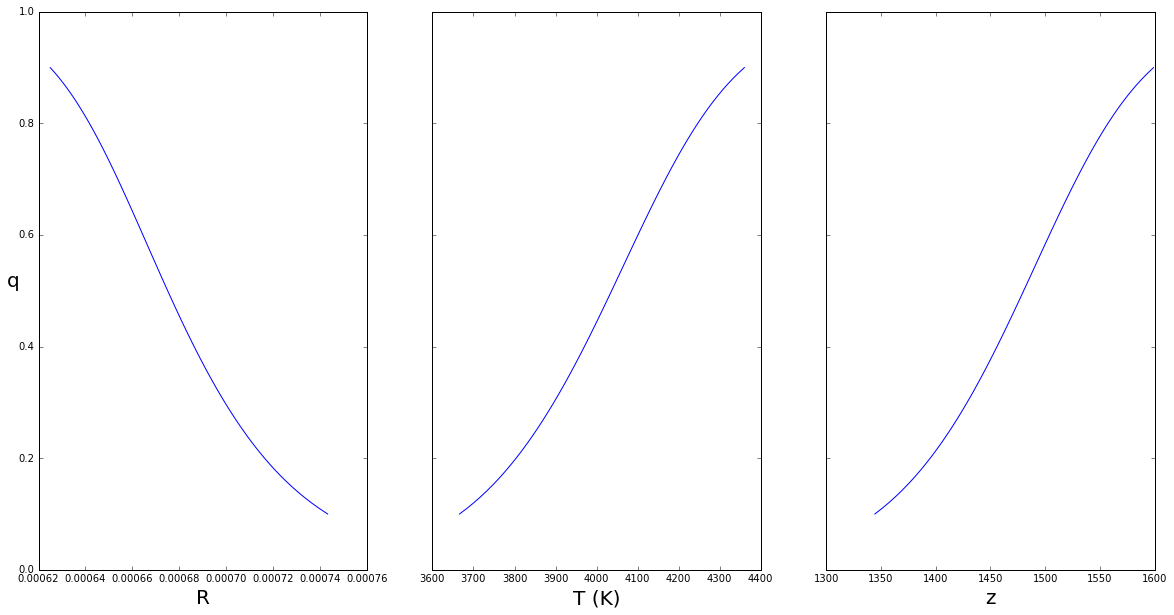

In [49]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
%matplotlib inline

# The Saha formula in the return statement with the base variables defined per data tuple
def Saha(R, *data):
    To, k, nbo, X, h,me,Ei,q = data 
    R = (R/1000.)
    return ((nbo * X) / R**3)*((R * h**2)/(2. * np.pi * me * k * To))**(3./2.)*np.exp((Ei * R)/ (k * To)) - (1.-q)/q**2

# starting value of q to make sure it goes from 0.1 to 0.9 in steps of 0.01 and definition of lists
q = 0.09
Rlist = []
qlist = []
zlist = []
Tlist = []


for i in range(81):
    
    q+=0.01
    qlist.append(q)
    data = (2.725, 1.381e-23, 5.4, 0.75, 6.626e-34, 9.109e-31, 13.6*1.602e-19,q)
    
    R = (so.fsolve(Saha,0.8,args=(data))/1000.)
    Rlist.append(R)
    
    T = 2.725/R
    Tlist.append(T)
    
    z = (1/R)-1
    zlist.append(z)
    
    if i == 0 or i == 80:
        print "\nat q = %0.2f we have:\n" % q
        print "R = %f" % R
        print "T = %0f" % T
        print "z = %f" % z
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10),sharey=True)
ax1.plot(Rlist,qlist)
ax1.set_ylabel("q",fontsize = 20, rotation=360)
ax1.set_xlabel("R", fontsize = 20)
ax2.plot(Tlist,qlist)
ax2.set_xlabel("T (K)" , fontsize = 20)
ax3.plot(zlist,qlist)
ax3.set_xlabel("z", fontsize = 20)

plt.show()


As can be seen in these plots when we have a higher fraction of ionization (q) we look farther in the universe(higher z) observe hotter temperatures and have a lower scale factor i.e we look farther into the past. Also since we assume q = 0.1 is the period of last scattering looking upwards of q to 0.9 which is the era of decoupling.

Also comparing our value for z at q = 0.1 and our value of T at 0.1 with WMAP. We get a significantly higher z and T. Looking at WMAP's page we find that their measurement is uncannily precise which might explain the difference. Also we assume that the last scattering occurs at q = 0.1 while WMAP actually measures the last scattered light itself.